## 대회 소개
- 출처 : 아파트 실거래가 예측
  - 문제 제공자: 직방(데이콘)
  - 부동산 빅데이터와 AI를 이용하여 실거래가를 예측 분석
- 문제 개요: 서울/부산 지역의 아파트 관련 정보를 바탕으로 실거래가를 예측

## 사용 데이터
- train.csv: 모델 학습용 데이터 (데이터가 커서 샘플링된 데이터 제공)/ test.csv: 모델 평가용 데이터
    - apartment_id: 아파트 ID
    - city, dong, jibun, add_kr: 아파트 주소 관련 변수(시, 동, 지번, 주소)
    - apt: 아파트 단지 이름
    - exclusive_use_area: 전용 면적
    - year_of_completion: 설립 일자
    - transaction_year_month, transaction_date: 거래 년월 및 날짜
    - floor: 층
    - transaction_real_price: 실거래가 (라벨, train.csv에만 존재)

## 사용 데이터2
- park.csv: 서울/부산 지역의 공원에 대한 정보
    - apartment_id : 아파트ID
    - city, gu, dong: 아파트 주소 관련 변수(시, 구, 동)
    - park_name: 공원 이름
    - park_type, park_area : 공원 유형, 공원 면적
    - park_exercise_facility ~ park_facility_other: 공원에 있는 시설
    - park_open_year: 공원 개장년도
    - reference_date : 데이터 기록 일자

## 사용 데이터 3
- day_care_center.csv: 서울/부산 지역의 어린이집에 대한 정보
    - city, gu: 어린이집 주소 관련 변수(시, 구)
    - day_care_name : 어린이집 이름
    - day_care_type : 어린이집 종류
    - day_care_baby_num ~ CCTV_num: 어린이집 시설 정보
    - reference_date : 데이터 기록 일자

## 변수변환 및 부착
### 구 변수 부착하기
- 가지고 있는 데이터는 시와 동만 있는데, 다른 데이터에 구만 있어서 병합이 어려울 것이라 예상됨
- 따라서 가지고 있는 데이터에 구 변수를 부착해야함

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-6.-실전-머신러닝-프로젝트\6. 실전 머신러닝 프로젝트\24. 아파트 실거래가 예측\데이터')

## train.csv 탐색 및 전처리

In [24]:
df = pd.read_csv('sampled_train.csv',engine = 'python', encoding = 'utf-8')

In [25]:
df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,10923,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,84.88,2002,201601,1~10,3,52000
1,10924,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,84.88,2002,201601,1~10,10,58000
2,10927,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,114.88,2002,201601,1~10,11,91500
3,10928,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,114.88,2002,201601,11~20,13,72000
4,10930,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,84.88,2002,201601,11~20,6,68300


#### 구 변수 추가

In [26]:
# 참조 데이터 불러오기
ref_df = pd.read_excel("한국행정구역분류.xlsx",
                       sheet_name = "법정동코드 연계 자료분석용",
                       header = 1)

ref_df.head()

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,관할지역,행정동 영문명칭,비고
0,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,11.0,1100000000,19880423,1100000000,NaN,Seoul,NaN
1,서울특별시,종로구,종로구,종로구,종로구,11010.0,1111000000,19880423,1111000000,NaN,Jongno-gu,NaN
2,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072.0,1111051500,20081101,1111010100,NaN,Cheongunhyoja-dong,NaN
3,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072.0,1111051500,20081101,1111010200,NaN,Cheongunhyoja-dong,NaN
4,서울특별시,종로구,청운효자동,청운효자동,궁정동,1101072.0,1111051500,20081101,1111010300,NaN,Cheongunhyoja-dong,NaN


In [27]:
# ref_df 필터링
ref_df = ref_df.loc[ref_df['시도'].isin(['서울특별시','부산광역시'])] # 서울특별시와 부산광역시 레코드만 가져옴
ref_df = ref_df[['시도','시군구','법정동']]
ref_df.head()

,시도,시군구,법정동
0,서울특별시,서울특별시,서울특별시
1,서울특별시,종로구,종로구
2,서울특별시,종로구,청운동
3,서울특별시,종로구,신교동
4,서울특별시,종로구,궁정동


In [28]:
# ref_df에 포함되어 있는 시도-읍면동과 df에 포함되어 있는 시도-읍면동이 일치하지 않는 경우를 확인해야 함
ref_df_loc = ref_df['시도'] + '-' + ref_df['법정동']
df_loc = (df['city']+ '-'+ df['dong']).unique()

In [29]:
ref_df_loc

0       서울특별시-서울특별시
1         서울특별시-종로구
2         서울특별시-청운동
3         서울특별시-신교동
4         서울특별시-궁정동
           ...     
1133      부산광역시-구칠리
1134      부산광역시-이곡리
1135      부산광역시-고촌리
1136      부산광역시-안평리
1137      부산광역시-임기리
Length: 1138, dtype: object

In [30]:
len(ref_df_loc)

1138

In [31]:
df_loc

array(['서울특별시-신당동', '서울특별시-행당동', '서울특별시-장안동', '서울특별시-신내동', '서울특별시-돈암동',
       '서울특별시-정릉동', '서울특별시-길음동', '서울특별시-하월곡동', '서울특별시-미아동', '서울특별시-방학동',
       '서울특별시-창동', '서울특별시-도봉동', '서울특별시-월계동', '서울특별시-공릉동', '서울특별시-상계동',
       '서울특별시-중계동', '서울특별시-신정동', '서울특별시-신월동', '서울특별시-화곡동', '서울특별시-가양동',
       '서울특별시-내발산동', '서울특별시-개봉동', '서울특별시-시흥동', '서울특별시-영등포동', '서울특별시-봉천동',
       '서울특별시-신림동', '서울특별시-반포동', '서울특별시-개포동', '서울특별시-대치동', '서울특별시-도곡동',
       '서울특별시-잠실동', '서울특별시-신천동', '서울특별시-가락동', '서울특별시-문정동', '서울특별시-명일동',
       '서울특별시-상일동', '서울특별시-암사동', '부산광역시-동삼동', '부산광역시-양정동', '부산광역시-부암동',
       '부산광역시-당감동', '부산광역시-개금동', '부산광역시-안락동', '부산광역시-사직동', '부산광역시-용호동',
       '부산광역시-금곡동', '부산광역시-화명동', '부산광역시-덕천동', '부산광역시-반여동', '부산광역시-재송동',
       '부산광역시-우동', '부산광역시-좌동', '부산광역시-하단동', '부산광역시-장림동', '부산광역시-다대동',
       '부산광역시-구서동', '부산광역시-명지동', '부산광역시-연산동', '부산광역시-남천동', '부산광역시-모라동',
       '부산광역시-정관읍 용수리'], dtype=object)

In [32]:
len(df_loc)

61

In [33]:
import numpy as np
np.isin(df_loc, ref_df_loc) # df_loc가 ref_df_loc에 포함되지 않는 경우가 다수 있음을 확인

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [34]:
# 포함되지 않는 동 목록 확인: 전부 부산광역시 이며 읍 단위인 경우에 이러한 문제가 발생함을 확인
df_loc[~np.isin(df_loc,ref_df_loc)]

array(['부산광역시-정관읍 용수리'], dtype=object)

In [35]:
# 장안읍 예시:
ref_df.loc[ref_df['법정동'].str.contains('장안')]

,시도,시군구,법정동
275,서울특별시,동대문구,장안동
276,서울특별시,동대문구,장안동
1086,부산광역시,기장군,장안읍
1091,부산광역시,기장군,장안리


In [36]:
# 시도와 법정동이 완전히 똑같은 행이 있어, 이를 제거함
ref_df = ref_df.drop_duplicates(subset = ['시도', '법정동'])

In [37]:
df['dong']

0            신당동
1            신당동
2            신당동
3            신당동
4            신당동
          ...   
36011    정관읍 용수리
36012    정관읍 용수리
36013    정관읍 용수리
36014    정관읍 용수리
36015    정관읍 용수리
Name: dong, Length: 36016, dtype: object

In [38]:
# 결론: df의 dong에 리가 붙어있으면 제거해야 함
df['dong'] = df['dong'].str.split(' ',expand = True).iloc[:,0]

# 재확인 정상적으로 작동함을 확인
df_loc = (df['city']+'-' + df['dong']).unique()
df_loc[~np.isin(df_loc, ref_df_loc)]

array([], dtype=object)

In [39]:
# df와 ref_df 병합
df = pd.merge(df, ref_df, left_on = ['city','dong'], right_on = ['시도','법정동'])

# ref_df에 있던 불필요한 변수 제거
df.drop(['시도','법정동'], axis = 1, inplace = True)

In [40]:
df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,시군구
0,10923,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,84.88,2002,201601,1~10,3,52000,중구
1,10924,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,84.88,2002,201601,1~10,10,58000,중구
2,10927,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,114.88,2002,201601,1~10,11,91500,중구
3,10928,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,114.88,2002,201601,11~20,13,72000,중구
4,10930,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,84.88,2002,201601,11~20,6,68300,중구


#### 불필요한 변수 제거

In [41]:
df.drop(['transaction_id', 'addr_kr'],axis = 1, inplace = True) # transaction_id는 인덱스와 동일하므로 삭제해도 무방

In [42]:
# apratment_id는 id지만 어느정도 사용이 가능할 것이라 보임 (완전히 유니크하지 않으므로)
df['apartment_id'].value_counts().head(10)

10939    1031
703       947
4080      685
9436      656
4018      632
8031      601
729       595
2944      590
6467      570
12432     526
Name: apartment_id, dtype: int64

#### 변수 변환

In [43]:
# 건축된지 얼마나 되었는지를 나타내는 변수로 변환
df['age'] = 2018 - df['year_of_completion']
df.drop('year_of_completion', axis = 1, inplace = True)

In [46]:
df['transaction_year_month']

0        201601
1        201601
2        201601
3        201601
4        201601
          ...  
36011    201709
36012    201710
36013    201710
36014    201710
36015    201711
Name: transaction_year_month, Length: 36016, dtype: int64

In [47]:
# 거래 년도 추출
# str accessor를 사용하기 위해, 타입 변경
df['transaction_year_month'] = df['transaction_year_month'].astype(str)

df['transaction_year'] = df['transaction_year_month'].str[:4].astype(int)
df['transaction_month'] = df['transaction_year_month'].str[4:].astype(int)
df.drop('transaction_year_month', axis = 1, inplace = True)

In [48]:
df['transaction_year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
36011    2017
36012    2017
36013    2017
36014    2017
36015    2017
Name: transaction_year, Length: 36016, dtype: int32

In [49]:
df['transaction_month']

0         1
1         1
2         1
3         1
4         1
         ..
36011     9
36012    10
36013    10
36014    10
36015    11
Name: transaction_month, Length: 36016, dtype: int32

In [50]:
# 도시가 둘 뿐이므로 서울특별시인지 나타내는 이진 변수 생성
df['Seoul'] = (df['city'] == '서울특별시').astype(int)

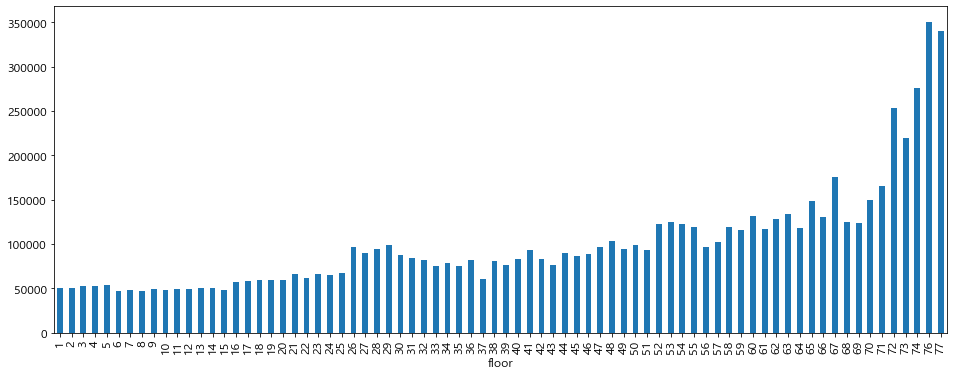

In [51]:
# floor 구간화 필요 : 2층과 3층의 가격 차이가 있을까?
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (16, 6)

# 대략적인 구간 확인: 1층 이하, 1 ~ 25층, 26층 ~ 49층, 50층 이상
df.groupby(['floor'])['transaction_real_price'].mean().plot(kind = 'bar')

In [52]:
# 층 수준을 생성한 뒤, 차이를 봄
def floor_level_converter(x):
    if x <= 15:
        return "low"
    elif x <= 25:
        return "middle"
    elif x <= 51:
        return "high"    
    else:
        return "very_high"
    
df['floor_level'] = df['floor'].apply(floor_level_converter)

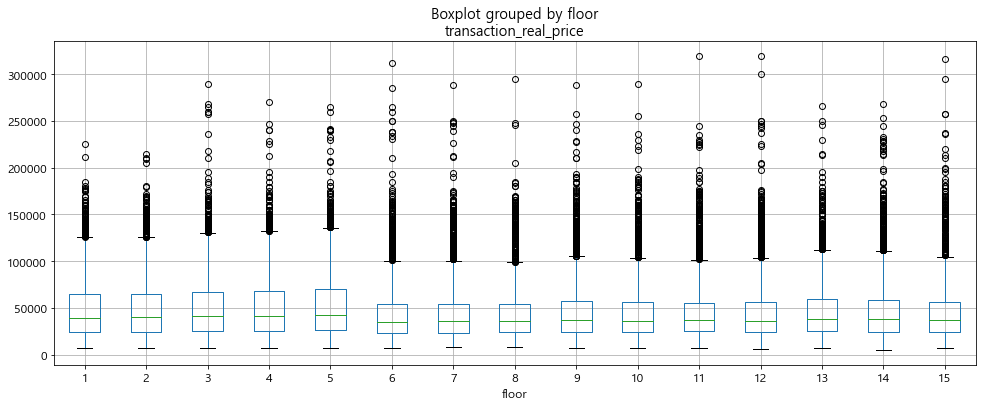

In [53]:
# 저층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'low'].boxplot(column = 'transaction_real_price', by = 'floor')

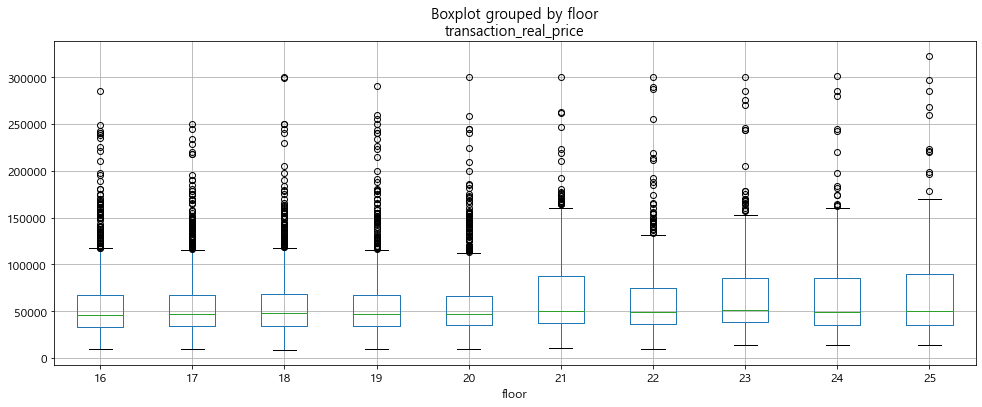

In [54]:
# 중층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'middle'].boxplot(column = 'transaction_real_price', by = 'floor')

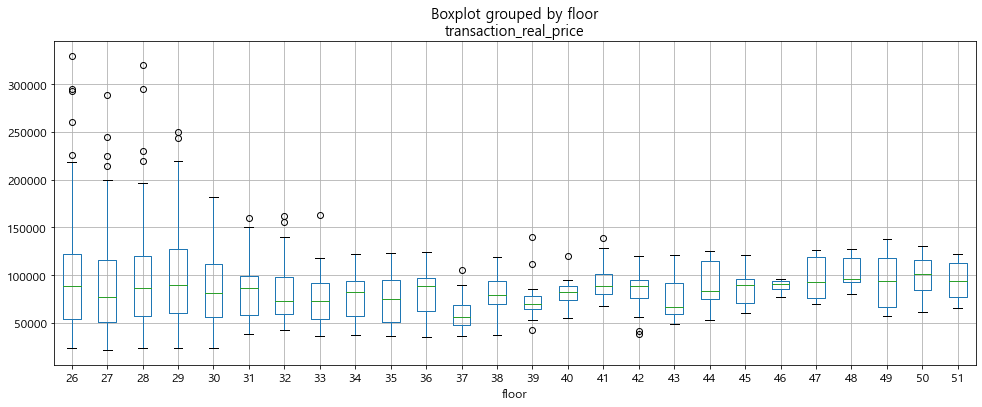

In [55]:
# 고층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'high'].boxplot(column = 'transaction_real_price', by = 'floor')

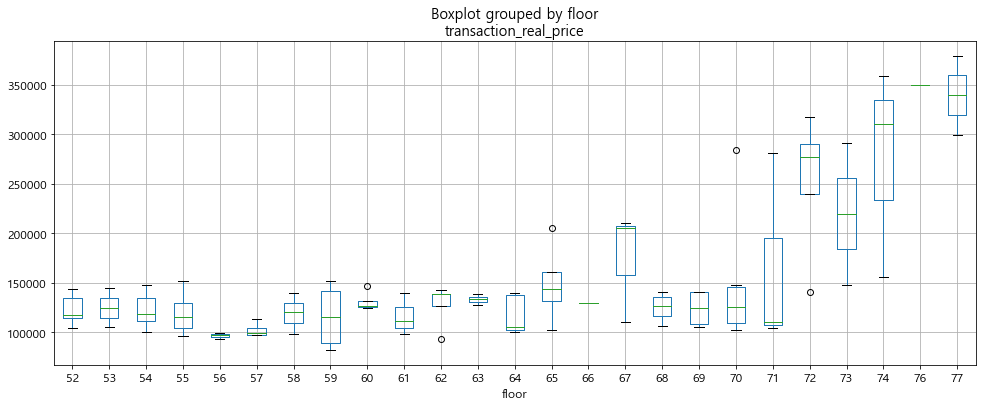

In [56]:
# 초고층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층이 높으면 높을수록 가격이 더 오름 (단, 72층을 기준으로 그런 현상이 두드러짐)
df.loc[df['floor_level'] == 'very_high'].boxplot(column = 'transaction_real_price', by = 'floor')

# 결론: floor_level 변수는 유의하나, floor 변수는 초고층에서만 유의
# 따라서 very high를 세분화하거나, floor_level 변수와 floor 변수를 같이 사용하고 교호작용을 고려할 수 있는 트리 계열의 모델 사용이 적합
# 여기서는 very high를 세분화하기로 결정

In [57]:
# 층 수준을 생성한 뒤, 차이를 봄
def floor_level_converter(x):
    if x <= 15:
        return "low"
    elif x <= 25:
        return "middle"
    elif x <= 51:
        return "high"    
    elif x <= 71: # 새로운 조건 추가
        return "very_high"    
    else:
        return "very_very_high"   

df['floor_level'] = df['floor'].apply(floor_level_converter)
df.drop('floor', axis = 1, inplace = True)

#### 시세 변수 추가

In [59]:
# 구별 전체 평균 시세 부착
mean_price_per_gu = df.groupby(['city','시군구'],as_index = False)['transaction_real_price'].mean()
mean_price_per_gu.rename({'transaction_real_price':'구별_전체_평균_시세'}, axis = 1, inplace = True)
df = pd.merge(df, mean_price_per_gu, on = ['city','시군구'])

In [60]:
mean_price_per_gu

,city,시군구,구별_전체_평균_시세
0,부산광역시,강서구,45726.583908
1,부산광역시,금정구,47061.246612
2,부산광역시,기장군,35605.185185
3,부산광역시,남구,48290.550725
4,부산광역시,동래구,38559.526316
5,부산광역시,부산진구,19736.860996
6,부산광역시,북구,31614.804251
7,부산광역시,사상구,15072.227723
8,부산광역시,사하구,20683.710385
9,부산광역시,수영구,52933.472803


In [66]:
price_per_gu_and_year = df.copy().groupby(['city','시군구','transaction_year'],as_index = False)['transaction_real_price'].agg(['mean','count'])
price_per_gu_and_year

mean  count
city  시군구  transaction_year                     
부산광역시 강서구  2016              44207.446735    291
           2017              48796.506944    144
      금정구  2016              44675.108225    231
           2017              51055.434783    138
      기장군  2016              34756.122449     98
...                                   ...    ...
서울특별시 영등포구 2017              52934.065934    182
      중구   2016              60128.461538    260
           2017              64166.273585    212
      중랑구  2016              26105.000000    164
           2017              28586.503497    143

[64 rows x 2 columns]

In [67]:
# 구별 작년 시세 부착
# price_per_gu_and_year 변수에 직접 수정을 하므로, df가 변경되는 것을 방지하기 위해, df.copy().groupby~를 사용
price_per_gu_and_year = df.copy().groupby(['city','시군구','transaction_year'],as_index = False)['transaction_real_price'].agg(['mean','count'])
price_per_gu_and_year = price_per_gu_and_year.reset_index().rename({"mean":"구별_작년_평균_시세", "count":"구별_작년_거래량"}, axis = 1)
price_per_gu_and_year

,city,시군구,transaction_year,구별_작년_평균_시세,구별_작년_거래량
0,부산광역시,강서구,2016,44207.446735,291
1,부산광역시,강서구,2017,48796.506944,144
2,부산광역시,금정구,2016,44675.108225,231
3,부산광역시,금정구,2017,51055.434783,138
4,부산광역시,기장군,2016,34756.122449,98
...,...,...,...,...,...
59,서울특별시,영등포구,2017,52934.065934,182
60,서울특별시,중구,2016,60128.461538,260
61,서울특별시,중구,2017,64166.273585,212
62,서울특별시,중랑구,2016,26105.000000,164


In [65]:
price_per_gu_and_year = df.copy().groupby(['city','시군구','transaction_year'],as_index = False)['transaction_real_price'].agg(['mean','count'])
price_per_gu_and_year

mean  count
city  시군구  transaction_year                     
부산광역시 강서구  2016              44207.446735    291
           2017              48796.506944    144
      금정구  2016              44675.108225    231
           2017              51055.434783    138
      기장군  2016              34756.122449     98
...                                   ...    ...
서울특별시 영등포구 2017              52934.065934    182
      중구   2016              60128.461538    260
           2017              64166.273585    212
      중랑구  2016              26105.000000    164
           2017              28586.503497    143

[64 rows x 2 columns]

In [68]:
price_per_gu_and_year['transaction_year'] += 1 # 작년것을 붙이기 위해, 1을 더함
df = pd.merge(df, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left') # 작년 기록이 없어서 붙지 않는 것을 방지하기 위해, how = 'left'로 설정
df['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행

In [70]:
df.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,transaction_date,transaction_real_price,시군구,age,transaction_year,transaction_month,Seoul,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량
0,1878,서울특별시,신당동,844,남산타운,84.88,1~10,52000,중구,16,2016,1,1,low,61942.055085,NaN,0.0
1,1878,서울특별시,신당동,844,남산타운,84.88,1~10,58000,중구,16,2016,1,1,low,61942.055085,NaN,0.0
2,1878,서울특별시,신당동,844,남산타운,114.88,1~10,91500,중구,16,2016,1,1,low,61942.055085,NaN,0.0
3,1878,서울특별시,신당동,844,남산타운,114.88,11~20,72000,중구,16,2016,1,1,low,61942.055085,NaN,0.0
4,1878,서울특별시,신당동,844,남산타운,84.88,11~20,68300,중구,16,2016,1,1,low,61942.055085,NaN,0.0


In [71]:
# 아파트별 평균 시세 부착
price_per_aid = df.copy().groupby(['apartment_id'], as_index = False)['transaction_real_price'].mean()
price_per_aid.rename({"transaction_real_price":"아파트별_평균가격"}, axis = 1, inplace = True)

df = pd.merge(df, price_per_aid, on = ['apartment_id'])

In [72]:
df.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,transaction_date,transaction_real_price,시군구,age,transaction_year,transaction_month,Seoul,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,아파트별_평균가격
0,1878,서울특별시,신당동,844,남산타운,84.88,1~10,52000,중구,16,2016,1,1,low,61942.055085,NaN,0.0,61942.055085
1,1878,서울특별시,신당동,844,남산타운,84.88,1~10,58000,중구,16,2016,1,1,low,61942.055085,NaN,0.0,61942.055085
2,1878,서울특별시,신당동,844,남산타운,114.88,1~10,91500,중구,16,2016,1,1,low,61942.055085,NaN,0.0,61942.055085
3,1878,서울특별시,신당동,844,남산타운,114.88,11~20,72000,중구,16,2016,1,1,low,61942.055085,NaN,0.0,61942.055085
4,1878,서울특별시,신당동,844,남산타운,84.88,11~20,68300,중구,16,2016,1,1,low,61942.055085,NaN,0.0,61942.055085


## 외부 데이터 부착

#### 공원 데이터

In [73]:
park_df = pd.read_csv('park.csv')
park_df.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [74]:
# 모든 값을 고려하는 것은 불가능하고, 그리 좋은 접근이 아닌 것으로 보임
park_df['park_exercise_facility'].unique()

array([nan, '게이트볼장', '풋살운동장', '배드민턴장', '야외헬스형운동기구 1개', '"축구장,배드민턴장"',
       '"배드민턴장,테니스장"', '"다목적운동장,농구장,배드민턴장"', '다목적운동장', '"배드민턴장, 게이트볼장"',
       '"테니스장,배드민턴장,체력단련시설"', 'x-game장', '"축구장, 게이트볼장, 테니스장"', '5', '3',
       '7', '12', '10조12종', '0', '5조9종', '10', '11조14종', '6', '8', '9',
       '4', '5조7종', '3조4종', '5조8종', '2조3종', '2', '11', '6조8종', '4조8종',
       '사격장', '철봉 등 6종', '철봉 2', '운동기구 6종',
       '"배드민턴장, 족구장, 게이트볼장, 농구장 반코트"', '테니스장', '"배드민턴장, 지압보도"',
       '헬스형 운동기구 등', '족구장', '"배드민턴장, 체력단련장"',
       '"운동장, 축구장, 농구장, 배드민턴장, 골프연습장, 체력단련장"',
       '"배드민턴장 2개소, 체력단련시설 6개소 36개"',
       '"배드민턴장 1개소, 농구장 1개소, 체력단련시설 3개소 29개"',
       '"배드민턴장 1개소, 농구정 1개소, 체력단련시설 1개소 7개"', '체력단련시설 1개소 3개', '없음',
       '체력단련시설 1개소 4개', '체력단련시설 1개소 6개', '체력단련시설 1개소 2개', '체력단련시설 1개소 7개',
       '체력단련시설 1개소 5개', '체력단련시설 2개소 5개', '체력단련시설 1개소', '배드민턴장 게이트볼장 족구장',
       '"실내배드민턴장, 구민운동장, 다목적체육관, 골프연습장"', '"배드민턴장, 체력단련기구"', '체력단련기구',
       '"농구장, 체력단련기구"', '"농구장, 배드민턴장, 체력단련기구"',
       '"테니스장, 배드민

In [75]:
park_df.columns

Index(['city', 'gu', 'dong', 'park_name', 'park_type', 'park_area',
       'park_exercise_facility', 'park_entertainment_facility',
       'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other',
       'park_open_year', 'reference_date'],
      dtype='object')

In [76]:
# 따라서 결측을 0으로, 결측이 아니면 1로 변환
facility_cols = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other']
for col in facility_cols:
    park_df.loc[park_df[col].notnull(), col] = 1
    park_df.loc[park_df[col].isnull(), col] = 0

In [78]:
# 동별 공원 수 
num_park_per_dong = park_df.groupby(['city', 'gu', 'dong'], as_index = False)['park_name'].count()
num_park_per_dong.rename({"park_name":"공원수"}, axis = 1, inplace = True)
num_park_per_dong

,city,gu,dong,공원수
0,부산광역시,강서구,녹산동,1
1,부산광역시,강서구,대저1동,1
2,부산광역시,강서구,명지동,25
3,부산광역시,강서구,송정동,2
4,부산광역시,강서구,신호동,4
...,...,...,...,...
239,서울특별시,중구,충무로5가,1
240,서울특별시,중구,황학동,1
241,서울특별시,중랑구,면목동,2
242,서울특별시,중랑구,묵동,2


In [79]:
# 동별 공원에 배치된 facilty 수
num_facilty_per_dong = park_df.groupby(['city', 'gu', 'dong'], as_index = False)[facility_cols].sum()
num_facilty_per_dong.head()

,city,gu,dong,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other
0,부산광역시,강서구,녹산동,1,0,1,0,1
1,부산광역시,강서구,대저1동,1,0,0,0,1
2,부산광역시,강서구,명지동,13,17,4,0,25
3,부산광역시,강서구,송정동,2,0,2,0,2
4,부산광역시,강서구,신호동,2,3,1,0,3


In [80]:
# 공원 데이터 부착
df = pd.merge(df, num_park_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
df['공원수'].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

df = pd.merge(df, num_facilty_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
df[facility_cols].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [81]:
df.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,transaction_date,transaction_real_price,시군구,age,...,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,아파트별_평균가격,공원수,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other
0,1878,서울특별시,신당동,844,남산타운,84.88,1~10,52000,중구,16,...,61942.055085,NaN,0.0,61942.055085,3.0,1.0,2.0,1.0,0.0,0.0
1,1878,서울특별시,신당동,844,남산타운,84.88,1~10,58000,중구,16,...,61942.055085,NaN,0.0,61942.055085,3.0,1.0,2.0,1.0,0.0,0.0
2,1878,서울특별시,신당동,844,남산타운,114.88,1~10,91500,중구,16,...,61942.055085,NaN,0.0,61942.055085,3.0,1.0,2.0,1.0,0.0,0.0
3,1878,서울특별시,신당동,844,남산타운,114.88,11~20,72000,중구,16,...,61942.055085,NaN,0.0,61942.055085,3.0,1.0,2.0,1.0,0.0,0.0
4,1878,서울특별시,신당동,844,남산타운,84.88,11~20,68300,중구,16,...,61942.055085,NaN,0.0,61942.055085,3.0,1.0,2.0,1.0,0.0,0.0


#### 어린이집 데이터

In [82]:
day_care_center_df = pd.read_csv('day_care_center.csv')
day_care_center_df.head()

# 가설: 같은 어린이집이어도 종류가 다르면 아파트 가격에 다르게 영향을 줄 것이다. 가령, 가정 사설어린이집보단 국공립어린이집이 더 인기가 좋을 것이다.
# 또한, 아이가 있는 부모라면, 어린이집 수와 케어 가능한 아이의 수 등만 보고 아파트 구매를 결정하지, 각 어린이집에 CCTV 개수가 몇개인지 등까진 파악하지 않을 것이다.
# 따라서 구 및 유형별 어린이집 수와 케어 가능한 아이 수만 집계

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [83]:
# 불필요한 변수 제거
day_care_center_df = day_care_center_df[['city', 'gu', 'day_care_type', 'day_care_baby_num']]

In [84]:
dummy_day_care_type = pd.get_dummies(day_care_center_df['day_care_type'], drop_first = False)
dummy_day_care_type = dummy_day_care_type.add_prefix("어린이집유형_")
day_care_center_df = pd.concat([day_care_center_df, dummy_day_care_type], axis = 1)
day_care_center_df.drop('day_care_type', axis = 1, inplace = True)
day_care_center_df.head()

,city,gu,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,서울특별시,서대문구,70,0,1,0,0,0,0,0
1,서울특별시,서대문구,88,0,1,0,0,0,0,0
2,서울특별시,서대문구,90,0,0,0,0,0,1,0
3,서울특별시,서대문구,18,1,0,0,0,0,0,0
4,서울특별시,서대문구,93,0,1,0,0,0,0,0


In [85]:
aggregated_day_care_center_df = day_care_center_df.groupby(['city', 'gu'], as_index = False)[day_care_center_df.columns[2:]].sum()
aggregated_day_care_center_df.head()

,city,gu,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,부산광역시,강서구,5312,71.0,6.0,35.0,0.0,5.0,5.0,1.0
1,부산광역시,금정구,5251,30.0,6.0,58.0,1.0,7.0,3.0,1.0
2,부산광역시,기장군,7689,98.0,13.0,56.0,0.0,5.0,3.0,3.0
3,부산광역시,남구,6676,65.0,12.0,50.0,2.0,6.0,6.0,2.0
4,부산광역시,동구,2214,8.0,9.0,11.0,2.0,2.0,7.0,0.0


In [86]:
# 어린이집 데이터 부착
df = pd.merge(df, aggregated_day_care_center_df, left_on = ['city', '시군구'], right_on = ['city', 'gu'], how = 'left')
df[aggregated_day_care_center_df.columns].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### 모델 학습

In [100]:
X = df.drop(['apartment_id', 'city', 'dong', 'jibun', 'apt', 'transaction_date', 'transaction_real_price', '시군구', 'transaction_year', 'transaction_month'], axis = 1)
Y = df['transaction_real_price']

In [101]:
X.head()

,exclusive_use_area,age,Seoul,floor_level,구별_전체_평균_시세,구별_작년_평균_시세,구별_작년_거래량,아파트별_평균가격,공원수,park_exercise_facility,...,park_cultural_facitiy,park_facility_other,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,84.88,16,1,low,61942.055085,NaN,0.0,61942.055085,3.0,1.0,...,0.0,0.0,4332.0,13.0,23.0,7.0,7.0,0.0,18.0,0.0
1,84.88,16,1,low,61942.055085,NaN,0.0,61942.055085,3.0,1.0,...,0.0,0.0,4332.0,13.0,23.0,7.0,7.0,0.0,18.0,0.0
2,114.88,16,1,low,61942.055085,NaN,0.0,61942.055085,3.0,1.0,...,0.0,0.0,4332.0,13.0,23.0,7.0,7.0,0.0,18.0,0.0
3,114.88,16,1,low,61942.055085,NaN,0.0,61942.055085,3.0,1.0,...,0.0,0.0,4332.0,13.0,23.0,7.0,7.0,0.0,18.0,0.0
4,84.88,16,1,low,61942.055085,NaN,0.0,61942.055085,3.0,1.0,...,0.0,0.0,4332.0,13.0,23.0,7.0,7.0,0.0,18.0,0.0


In [102]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape # 샘플 대비 특징이 매우 적음 => 큰 부담없이 더미화 가능
# 컬럼 타입이 섞여 있으므로, 트리 계열의 모델이 적절한 것으로 판단됨
# 또한, 샘플이 충분히 많으므로 트리 뿐만 아니라 트리 기반의 앙상블도 적절할 것으로 보임
# Tip. Decision Tree 계열의 모델은 상대적으로 전처리나 탐색의 부담이 제일 적은 모델임

(27012, 22)

In [103]:
# 더미화
from feature_engine.encoding import OneHotEncoder as OHE
dummy_model = OHE(variables = ['floor_level'],
                 drop_last = False)
dummy_model.fit(Train_X)

Train_X = dummy_model.transform(Train_X)
Test_X = dummy_model.transform(Test_X)

In [104]:
# 변수 부착 과정에서 생성된 결측 대체
from sklearn.impute import SimpleImputer as SI
imputer = SI().fit(Train_X)
Train_X = pd.DataFrame(imputer.transform(Train_X), columns = Train_X.columns)
Test_X = pd.DataFrame(imputer.transform(Test_X), columns = Test_X.columns)

In [105]:
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGB
from lightgbm import LGBMRegressor as LGB

In [106]:
model_parameter_dict = dict()
RFR_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                   "n_estimators": [100, 200]})

XL_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                  "n_estimators": [100, 200],
                                  "learning_rate": [0.05, 0.1, 0.2]})

model_parameter_dict[RFR] = RFR_parameter_grid
model_parameter_dict[XGB] = XL_parameter_grid
model_parameter_dict[LGB] = XL_parameter_grid

In [107]:
# 출력을 위한 max_iter_num 계산
max_iter_num = len(range(20, 4, -5)) * len(model_parameter_dict) * len(XL_parameter_grid) ** 2
           
from sklearn.metrics import mean_absolute_error as MAE
best_score = 9999999999
iteration_num = 0
for k in range(20, 4, -5): 
    selector = SelectKBest(mutual_info_regression, k = k).fit(Train_X, Train_Y)
    s_Train_X = selector.transform(Train_X)
    s_Test_X = selector.transform(Test_X)

    
    for model_func in model_parameter_dict.keys():
        for parameter in model_parameter_dict[model_func]:
            model = model_func(**parameter).fit(s_Train_X, Train_Y) # Light GBM은 DataFrame의 컬럼 이름에 대한 제약이 있어, ndarray를 입력으로 사용
            pred_Y = model.predict(s_Test_X)
            score = MAE(Test_Y, pred_Y)
            
            if score < best_score:
                print(k, model_func, parameter, score)
                best_score = score
                best_model_func = model_func
                best_parameter = parameter
                best_selector = selector

            iteration_num += 1
            print("iter_num:{}/{}, score: {}, best_score: {}".format(iteration_num, max_iter_num, round(score, 2), round(best_score, 2)))

20 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 3, 'n_estimators': 100} 8659.97254304564
iter_num:1/3888, score: 8659.97, best_score: 8659.97
iter_num:2/3888, score: 8667.94, best_score: 8659.97
20 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 4, 'n_estimators': 100} 7007.6512419437795
iter_num:3/3888, score: 7007.65, best_score: 7007.65
iter_num:4/3888, score: 7076.19, best_score: 7007.65
20 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 5, 'n_estimators': 100} 5759.602566367479
iter_num:5/3888, score: 5759.6, best_score: 5759.6
20 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 5, 'n_estimators': 200} 5736.544469871794
iter_num:6/3888, score: 5736.54, best_score: 5736.54
20 <class 'xgboost.sklearn.XGBRegressor'> {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} 4216.292129062431
iter_num:7/3888, score: 4216.29, best_score: 4216.29
20 <class 'xgboost.sklearn.XGBRegressor'> {'le

iter_num:100/3888, score: 3902.56, best_score: 2948.61
iter_num:101/3888, score: 3911.32, best_score: 2948.61
iter_num:102/3888, score: 3841.26, best_score: 2948.61
iter_num:103/3888, score: 4076.11, best_score: 2948.61
iter_num:104/3888, score: 3928.94, best_score: 2948.61
iter_num:105/3888, score: 3916.84, best_score: 2948.61
iter_num:106/3888, score: 3844.98, best_score: 2948.61
iter_num:107/3888, score: 3852.29, best_score: 2948.61
iter_num:108/3888, score: 3821.85, best_score: 2948.61
iter_num:109/3888, score: 4740.94, best_score: 2948.61
iter_num:110/3888, score: 4280.39, best_score: 2948.61
iter_num:111/3888, score: 4270.58, best_score: 2948.61
iter_num:112/3888, score: 4060.02, best_score: 2948.61
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
iter_num:113/3888, score: 4096.3, best_score: 2948.61
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
iter_num:114/3888, score: 3

In [108]:
final_X = pd.concat([Train_X, Test_X], axis = 0, ignore_index = True)
final_Y = pd.concat([Train_Y, Test_Y], axis = 0, ignore_index = True)

final_model = best_model_func(**best_parameter).fit(best_selector.transform(final_X), final_Y)

### 파이프라인 구축

In [109]:
def pipeline(new_data, ref_df, model, selector, mean_price_per_gu, num_park_per_dong, num_facilty_per_dong, aggregated_day_care_center_df, imputer, dummy_model):
    ## 변수 변환 및 부착
    new_data['dong'] = new_data['dong'].str.split(' ', expand = True).iloc[:, 0] # dong에 리가 붙어있으면 제거
    
    new_data = pd.merge(new_data, ref_df, left_on = ['city', 'dong'], right_on = ['시도', '법정동']) # 시군구 부착 
    
    new_data.drop(['시도', '법정동', 'transaction_id', 'addr_kr'], axis = 1, inplace = True) # 불필요한 변수 제거
    
    # age 변수 부착
    new_data['age'] = 2018 - new_data['year_of_completion']
    new_data.drop('year_of_completion', axis = 1, inplace = True)    
    
    # 거래 년월 부착
    new_data['transaction_year_month'] = new_data['transaction_year_month'].astype(str)
    new_data['transaction_year'] = new_data['transaction_year_month'].str[:4].astype(int)
    new_data['transaction_month'] = new_data['transaction_year_month'].str[4:].astype(int)
    new_data.drop('transaction_year_month', axis = 1, inplace = True)   

    # Seoul 생성
    new_data['Seoul'] = (new_data['city'] == "서울특별시").astype(int)    
    
    # floor_level 변수 생성
    new_data['floor_level'] = new_data['floor'].apply(floor_level_converter)
    new_data.drop('floor', axis = 1, inplace = True)    
    
    # 시세 관련 변수 추가
    new_data = pd.merge(new_data, mean_price_per_gu, on = ['city', '시군구'])
    new_data = pd.merge(new_data, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left')
    new_data['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행
           
    new_data = pd.merge(new_data, price_per_aid, on = ['apartment_id'], how = 'left')
    
    
    # 공원 데이터 부착
    new_data = pd.merge(new_data, num_park_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    new_data['공원수'].fillna(0, inplace = True)
    new_data.drop('gu', axis = 1, inplace = True)

    new_data = pd.merge(new_data, num_facilty_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    
    facility_cols = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other']
    new_data[facility_cols].fillna(0, inplace = True)
    new_data.drop('gu', axis = 1, inplace = True)    
    
    # 어린이집 데이터 부착
    new_data = pd.merge(new_data, aggregated_day_care_center_df, left_on = ['city', '시군구'], right_on = ['city', 'gu'], how = 'left')
    new_data[aggregated_day_care_center_df.columns].fillna(0, inplace = True)
    new_data.drop('gu', axis = 1, inplace = True)
    
    # 특징 추출 ('transaction_real_price'는 drop 대상에서 제외)
    X = new_data.drop(['apartment_id', 'city', 'dong', 'jibun', 'apt', 'transaction_date', '시군구', 'transaction_year', 'transaction_month'], axis = 1)
    
    # 더미화
    X = dummy_model.transform(X)
    
    # 결측 대체
    X = imputer.transform(X)
            
    # 특징 선택
    X = selector.transform(X)
    
    return model.predict(X)

In [110]:
import pickle
pipeline_element = {"ref_df": ref_df,
                   "model":final_model,
                   "selector":best_selector,
                   "mean_price_per_gu":mean_price_per_gu,
                   "num_park_per_dong":num_park_per_dong,
                   "num_facilty_per_dong":num_facilty_per_dong,
                   "aggregated_day_care_center_df":aggregated_day_care_center_df,
                   "imputer":imputer,
                   "dummy_model":dummy_model,
                   "pipeline":pipeline}

with open("아파트실거래가예측모델.pckl", "wb") as f:
    pickle.dump(pipeline_element, f)

In [111]:
with open("아파트실거래가예측모델.pckl", "rb") as f:
    pipeline_element = pickle.load(f)

ref_df = pipeline_element["ref_df"]
model = pipeline_element["model"]
selector = pipeline_element["selector"]                 
mean_price_per_gu = pipeline_element["mean_price_per_gu"]
num_park_per_dong = pipeline_element["num_park_per_dong"]
num_facilty_per_dong = pipeline_element["num_facilty_per_dong"]
aggregated_day_care_center_df = pipeline_element["aggregated_day_care_center_df"]
imputer = pipeline_element["imputer"]
dummy_model = pipeline_element["dummy_model"]
pipeline = pipeline_element["pipeline"]

In [112]:
test_df = pd.read_csv("sampled_test.csv")
test_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1197195,4018,서울특별시,암사동,414-2,롯데캐슬퍼스트,암사동 414-2 롯데캐슬퍼스트,102.34,2008,201712,21~31,9
1,1190777,520,서울특별시,가락동,140,가락(1차)쌍용아파트,가락동 140 가락(1차)쌍용아파트,59.92,1997,201712,21~31,15
2,1197165,6467,서울특별시,암사동,509,선사현대아파트,암사동 509 선사현대아파트,59.64,2000,201712,21~31,6
3,1179572,731,서울특별시,개포동,189,개포주공 4단지,개포동 189 개포주공 4단지,50.67,1982,201707,1~10,3
4,1131476,5950,서울특별시,상계동,626,상계주공14(고층),상계동 626 상계주공14(고층),90.94,1989,201712,11~20,6


In [113]:
output = pipeline(test_df, ref_df, model, selector, mean_price_per_gu, num_park_per_dong, num_facilty_per_dong, aggregated_day_care_center_df, imputer, dummy_model)
result = pd.Series(output, index = test_df['transaction_id'])
result

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


transaction_id
1197195    77337.281250
1190777    45967.140625
1197165    73113.421875
1179572    80616.468750
1131476    68845.054688
               ...     
1162728    49775.808594
1214400    59233.281250
1210776    40953.675781
1190462    41553.132812
1190418    53498.863281
Length: 389, dtype: float32